<h1> Data Preprocessing </h1>
<i> Here we are going to prepare our data </>

In [342]:
#Loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h2> Import and Understand Source Dataset </h2>

We have used two mains data sources: World Bank open Data and FAO data which linkS can be found down here:

WDI open data link: https://databank.worldbank.org/source/world-development-indicators

FAO link : https://www.fao.org/faostat/fr/#data/QCL

Data where collected on two difference platforms (WDI & FAO) for the year 2020


In [343]:
#Loading data through the Github Repository: 
# please uncomment the code to log in data from our repository

#Loading the data from the device
df_climatefeat = pd.read_excel("C:\\Users\\MAYOU\\Documents\\GOMBOS\\DATATHON\\UN DATATHON\\Data\\Climate_features.xlsx")
df_yields = pd.read_excel("C:\\Users\\MAYOU\\Documents\\GOMBOS\\DATATHON\\UN DATATHON\\Data\\Yields_Cereals.xlsx")

<h2> Data preprocessing </h2>
Here we are going to merge first preprocess each of our datasets (Climate features and Cereals's yields dataset) then merge the both datasets before starting the explanatory analysis 

In [344]:
df_climatefeat.head()

,Time,Country Name,Country Code,Agricultural land (% of land area) [AG.LND.AGRI.ZS],Urban population growth (annual %) [SP.URB.GROW],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Population growth (annual %) [SP.POP.GROW],"Agriculture, forestry, and fishing, value added (annual % growth) [NV.AGR.TOTL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]",Population in urban agglomerations of more than 1 million (% of total population) [EN.URB.MCTY.TL.ZS],CO2 emissions (kt) [EN.ATM.CO2E.KT],Access to electricity (% of population) [EG.ELC.ACCS.ZS],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Cereal yield (kg per hectare) [AG.YLD.CREL.KG],Average precipitation in depth (mm per year) [AG.LND.PRCP.MM],Forest area (% of land area) [AG.LND.FRST.ZS],Arable land (% of land area) [AG.LND.ARBL.ZS]
0,2020,Angola,AGO,36.810780,4.242778,66.825,3.268348,2.843708,9.946544,0.476824,24.918263,19814.500,46.955444,61.02,992.5,1010,53.426951,4.305767
1,2020,Benin,BEN,35.030153,3.980016,48.415,2.829138,1.753330,27.109175,1.262136,NaN,7980.400,40.985931,46.20,1432.8,1039,27.803742,24.831501
2,2020,Botswana,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,NaN,5763.687,71.829124,27.21,1034.7,416,26.917050,0.458772
3,2020,Burkina Faso,BFA,46.103801,4.758616,30.607,2.688788,5.146184,18.398079,6.544000,12.918177,5456.700,18.467279,67.51,1261.7,748,22.720760,21.944444
4,2020,Burundi,BDI,80.841121,5.393633,13.708,2.867082,2.800360,28.624950,2.784294,NaN,713.466,9.100000,83.52,1261.7,1274,10.889408,48.403427


In [345]:
#rename the columns
origin_name = df_climatefeat.columns
df_climatefeat.columns


Index(['Time', 'Country Name', 'Country Code',
       'Agricultural land (% of land area) [AG.LND.AGRI.ZS]',
       'Urban population growth (annual %) [SP.URB.GROW]',
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]',
       'Population growth (annual %) [SP.POP.GROW]',
       'Agriculture, forestry, and fishing, value added (annual % growth) [NV.AGR.TOTL.KD.ZG]',
       'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]',
       'Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]',
       'Population in urban agglomerations of more than 1 million (% of total population) [EN.URB.MCTY.TL.ZS]',
       'CO2 emissions (kt) [EN.ATM.CO2E.KT]',
       'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
       'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',
       'Cereal yield (kg per hectare) [AG.YLD.CREL.KG]',
       'Average precipitation in depth (mm per year) [AG.LND

 Here we are going to rename the feature

In [346]:
climate_fname = ["year","country","ISO code","agriland", "urbpop", "urbgrowth","popgrowth", "AGFOFI", "AGFOFI2", "freshwith","popagg","CO2","electric","renew_energy","cerealyield","precipitation","forestarea","arabland"]
df_climatefeat.columns = climate_fname
df_climatefeat.columns

Index(['year', 'country', 'ISO code', 'agriland', 'urbpop', 'urbgrowth',
       'popgrowth', 'AGFOFI', 'AGFOFI2', 'freshwith', 'popagg', 'CO2',
       'electric', 'renew_energy', 'cerealyield', 'precipitation',
       'forestarea', 'arabland'],
      dtype='object')

In [347]:
#Let's remove the year column

df_climatefeat.drop('year', axis=1, inplace=True)
df_climatefeat.head() 

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,popagg,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland
0,Angola,AGO,36.810780,4.242778,66.825,3.268348,2.843708,9.946544,0.476824,24.918263,19814.500,46.955444,61.02,992.5,1010,53.426951,4.305767
1,Benin,BEN,35.030153,3.980016,48.415,2.829138,1.753330,27.109175,1.262136,NaN,7980.400,40.985931,46.20,1432.8,1039,27.803742,24.831501
2,Botswana,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,NaN,5763.687,71.829124,27.21,1034.7,416,26.917050,0.458772
3,Burkina Faso,BFA,46.103801,4.758616,30.607,2.688788,5.146184,18.398079,6.544000,12.918177,5456.700,18.467279,67.51,1261.7,748,22.720760,21.944444
4,Burundi,BDI,80.841121,5.393633,13.708,2.867082,2.800360,28.624950,2.784294,NaN,713.466,9.100000,83.52,1261.7,1274,10.889408,48.403427


In [348]:
df_yields.head()

,Domaine,Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,Cultures et produits animaux,South Africa,5419,Rendement,111,Blé,2020,2020,100 g/ha,41585,A,Chiffre officiel,NaN
1,Cultures et produits animaux,South Africa,5419,Rendement,111,Blé,2021,2021,100 g/ha,43118,A,Chiffre officiel,NaN
2,Cultures et produits animaux,South Africa,5419,Rendement,112,Maïs,2020,2020,100 g/ha,54478,A,Chiffre officiel,NaN
3,Cultures et produits animaux,South Africa,5419,Rendement,112,Maïs,2021,2021,100 g/ha,54102,A,Chiffre officiel,NaN
4,Cultures et produits animaux,South Africa,5419,Rendement,113,Riz,2020,2020,100 g/ha,28212,E,Valeur estimée,NaN


In [349]:
#remove unuseful columns
df_yields.drop(df_yields.columns[[0,2,3,4,6,8,10,11,12]], axis=1, inplace=True)
df_yields.head()

,Zone,Produit,Année,Valeur
0,South Africa,Blé,2020,41585
1,South Africa,Blé,2021,43118
2,South Africa,Maïs,2020,54478
3,South Africa,Maïs,2021,54102
4,South Africa,Riz,2020,28212


In [350]:
df_yields.dtypes

Zone       object
Produit    object
Année       int64
Valeur      int64
dtype: object

In [351]:
#Select only data from 2020
df_yields = df_yields[df_yields["Année"] == 2020]
df_yields

,Zone,Produit,Année,Valeur
0,South Africa,Blé,2020,41585
2,South Africa,Maïs,2020,54478
4,South Africa,Riz,2020,28212
6,South Africa,Sorgho,2020,37176
8,Angola,Blé,2020,8841
...,...,...,...,...
276,Zambia,Sorgho,2020,5681
278,Zimbabwe,Blé,2020,47796
280,Zimbabwe,Maïs,2020,11801
282,Zimbabwe,Riz,2020,5951


In [352]:
#different type of culture
df_yields["Produit"].value_counts()

#form 04 variables for maizes, rice, sorgho and ble
yield_maize = df_yields[df_yields["Produit"] == "Maïs"] #for maize

yield_rice = df_yields[df_yields["Produit"] == "Riz"] #for rice

yield_sorgho = df_yields[df_yields["Produit"] == "Sorgho"] #for Sorgho

yield_ble = df_yields[df_yields["Produit"] == "Blé"] #for ble

#drop unuseful columns
yield_maize.drop(yield_maize.columns[[1,2]], axis=1, inplace=True)
yield_ble.drop(yield_ble.columns[[1,2]], axis=1, inplace=True)
yield_sorgho.drop(yield_sorgho.columns[[1,2]], axis=1, inplace=True)
yield_rice.drop(yield_rice.columns[[1,2]], axis=1, inplace=True)

c:\Users\MAYOU\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [353]:
#merge all value (yields and climate features)
#rename columns
yield_maize.columns = ["Zone","yMaize"]
yield_ble.columns = ["Zone","yBle"]
yield_sorgho.columns = ["Zone","ysorgho"]
yield_rice.columns = ["Zone","yrice"]



In [354]:
#merge with maize
df = pd.merge(df_climatefeat, yield_maize, how= 'outer',left_on='country', right_on='Zone')
#merge with ble
df = pd.merge(df, yield_ble, how= 'outer',left_on='country', right_on='Zone')
#merge with rice
df = pd.merge(df, yield_rice, how= 'outer',left_on='country', right_on='Zone')
#merge with sorgho
df = pd.merge(df, yield_sorgho, how= 'outer',left_on='country', right_on='Zone')

In [355]:
df.shape

(48, 25)

In [356]:
#Drop unuseful columns
df.drop(df.columns[[17,19,21,23]],axis=1, inplace=True)
df.head()

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,popagg,...,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yBle,yrice,ysorgho
0,Angola,AGO,36.810780,4.242778,66.825,3.268348,2.843708,9.946544,0.476824,24.918263,...,46.955444,61.02,992.5,1010,53.426951,4.305767,10993.0,8841.0,12375.0,2286.0
1,Benin,BEN,35.030153,3.980016,48.415,2.829138,1.753330,27.109175,1.262136,NaN,...,40.985931,46.20,1432.8,1039,27.803742,24.831501,NaN,NaN,NaN,NaN
2,Botswana,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,NaN,...,71.829124,27.21,1034.7,416,26.917050,0.458772,6670.0,13615.0,NaN,17876.0
3,Burkina Faso,BFA,46.103801,4.758616,30.607,2.688788,5.146184,18.398079,6.544000,12.918177,...,18.467279,67.51,1261.7,748,22.720760,21.944444,17625.0,NaN,22377.0,10605.0
4,Burundi,BDI,80.841121,5.393633,13.708,2.867082,2.800360,28.624950,2.784294,NaN,...,9.100000,83.52,1261.7,1274,10.889408,48.403427,11607.0,7150.0,30089.0,5319.0


After process our data separely and merge the final, in this part, we are going to explore the final dataframe and processing it before the modelisation and mapping

In [357]:
df.describe()

,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,popagg,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yBle,yrice,ysorgho
count,48.000000,48.000000,48.000000,48.000000,45.000000,45.000000,47.000000,30.000000,48.000000,48.000000,48.000000,46.000000,48.000000,48.000000,48.000000,43.000000,26.000000,37.000000,37.000000
mean,47.189899,3.526062,44.130375,2.335148,3.081412,19.939353,30.684186,17.396353,15851.419021,51.198888,62.555000,1585.067391,1108.166667,30.434015,15.134025,17662.604651,23273.769231,22681.243243,9741.405405
std,21.679838,1.081696,17.693011,0.749503,5.496644,12.378553,108.146824,11.780640,58003.759316,25.066798,26.582123,1400.065229,688.720779,24.157555,14.620729,15101.525016,17969.734846,12901.017990,6834.276713
min,3.369565,-0.012402,13.708000,0.002291,-13.464656,2.208063,0.020721,4.090504,141.100000,7.260934,1.340000,15.700000,92.000000,0.303483,0.326087,157.000000,3992.000000,4834.000000,1860.000000
25%,34.795802,2.988313,30.300250,1.982510,0.086442,9.158178,0.965613,10.222926,1171.550000,33.030855,41.562500,880.850000,650.250000,11.114924,4.281581,8513.500000,11322.000000,13091.000000,5681.000000
50%,45.868762,3.625551,43.416000,2.495521,3.291884,20.320863,3.993323,14.198124,3899.950000,50.253815,71.070000,1322.750000,1035.500000,23.761417,10.504244,15237.000000,16803.500000,19989.000000,8970.000000
75%,64.972071,4.203563,55.832500,2.774869,4.837164,26.660478,8.915233,21.089217,8063.425000,67.478975,82.762500,1790.800000,1520.500000,45.501733,21.011002,20245.000000,28945.000000,29292.000000,10605.000000
max,80.841121,5.737879,90.092000,3.727101,17.206766,59.487396,673.375000,63.175396,393241.600000,100.000000,96.160000,8942.500000,3200.000000,91.320681,49.233887,89425.000000,73680.000000,63973.000000,37176.000000


In [358]:
#Explore NAN
df.isna()

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,popagg,...,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yBle,yrice,ysorgho
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True


In [359]:
df.dtypes

country           object
ISO code          object
agriland         float64
urbpop           float64
urbgrowth        float64
popgrowth        float64
AGFOFI           float64
AGFOFI2          float64
freshwith        float64
popagg           float64
CO2              float64
electric         float64
renew_energy     float64
cerealyield      float64
precipitation      int64
forestarea       float64
arabland         float64
yMaize           float64
yBle             float64
yrice            float64
ysorgho          float64
dtype: object

In [360]:
#identifying NAN for each feature

missing_val = df.isnull().sum()
missing_val

country           0
ISO code          0
agriland          0
urbpop            0
urbgrowth         0
popgrowth         0
AGFOFI            3
AGFOFI2           3
freshwith         1
popagg           18
CO2               0
electric          0
renew_energy      0
cerealyield       2
precipitation     0
forestarea        0
arabland          0
yMaize            5
yBle             22
yrice            11
ysorgho          11
dtype: int64

In [361]:
#Identifier les pays qui sont concernés par le manque de variables

#pop agg
country_1 = df[pd.isnull(df.popagg)]['country']
#Yrice
country_2 = df[pd.isnull(df.yrice)]['country']
#Yble
country_3 = df[pd.isnull(df.yBle)]['country']

#Ysorgho
country_4 = df[pd.isnull(df.ysorgho)]['country']

In [362]:
#Find the country that have missing data on all of the features with many missing values
First_selec = pd.merge(country_1, country_2)
Sec_select = pd.merge (First_selec, country_3)
Trd_select = pd.merge (Sec_select, country_4)
Trd_select # country which will be deleted


,country
0,Benin
1,Cabo Verde
2,Guinea-Bissau
3,Mauritius
4,Sao Tome and Principe
5,Seychelles


In [363]:
country_1
df.drop([1,5,21,29,35,37],axis=0,inplace = True)

In [364]:
df.shape

(42, 21)

In [365]:
#Missing value
missing_val2 = df.isnull().sum()
missing_val2

country           0
ISO code          0
agriland          0
urbpop            0
urbgrowth         0
popgrowth         0
AGFOFI            3
AGFOFI2           3
freshwith         0
popagg           12
CO2               0
electric          0
renew_energy      0
cerealyield       1
precipitation     0
forestarea        0
arabland          0
yMaize            2
yBle             16
yrice             5
ysorgho           5
dtype: int64

In [366]:
#Delete Popagg and yBle
df.drop(df.columns[[9,18]], axis=1, inplace = True)

In [367]:
df.reset_index(inplace = True, drop= True)
df.head()

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
0,Angola,AGO,36.810780,4.242778,66.825,3.268348,2.843708,9.946544,0.476824,19814.500,46.955444,61.02,992.5,1010,53.426951,4.305767,10993.0,12375.0,2286.0
1,Botswana,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,5763.687,71.829124,27.21,1034.7,416,26.917050,0.458772,6670.0,NaN,17876.0
2,Burkina Faso,BFA,46.103801,4.758616,30.607,2.688788,5.146184,18.398079,6.544000,5456.700,18.467279,67.51,1261.7,748,22.720760,21.944444,17625.0,22377.0,10605.0
3,Burundi,BDI,80.841121,5.393633,13.708,2.867082,2.800360,28.624950,2.784294,713.466,9.100000,83.52,1261.7,1274,10.889408,48.403427,11607.0,30089.0,5319.0
4,Cameroon,CMR,20.625754,3.745673,57.560,2.711854,1.361914,17.496865,0.398681,9928.400,64.311874,78.94,1665.8,1604,43.029511,13.115864,17694.0,12327.0,16994.0


 <H3> Fill missing Values </H3>
  here we are going to fill the missing value of: yMaize, Yrice, ySorgho, AGRFOFI and AGROFOFI2

In [368]:
#Distribution of variables
%matplotlib inline 

def plot_histograms(data):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    colors = ['red', 'blue', 'green']

    for i, ax in enumerate(axes.flat):
        variable = data[i]
        ax.hist(variable, density=True, alpha=0.75, color=colors[i])
        sns.kdeplot(variable, color=colors[i], linestyle='-', linewidth=2)
        ax.set_title(f'Variable {i+1}')
        ax.set_xlabel('Valeur')
        ax.set_ylabel('Fréquence / Densité')

    plt.tight_layout()
    plt.show()

def plot_histograms2(data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    colors = ['blue', 'green']

    for i, ax in enumerate(axes.flat):
        variable = data[i]
        ax.hist(variable, density=True, alpha=0.75, color=colors[i])
        sns.kdeplot(variable, color=colors[i], linestyle='-', linewidth=2)
        ax.set_title(f'Variable {i+1}')
        ax.set_xlabel('Valeur')
        ax.set_ylabel('Fréquence / Densité')

    plt.tight_layout()
    plt.show()


c:\Users\MAYOU\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\MAYOU\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
c:\Users\MAYOU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\Users\MAYOU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


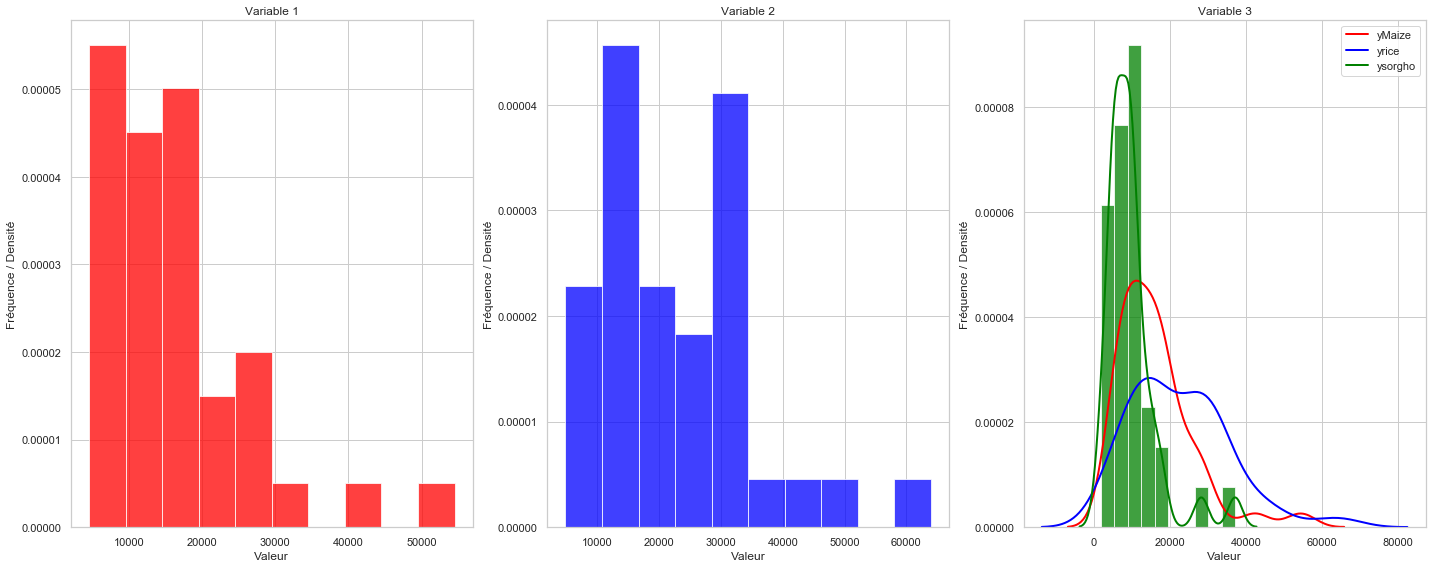

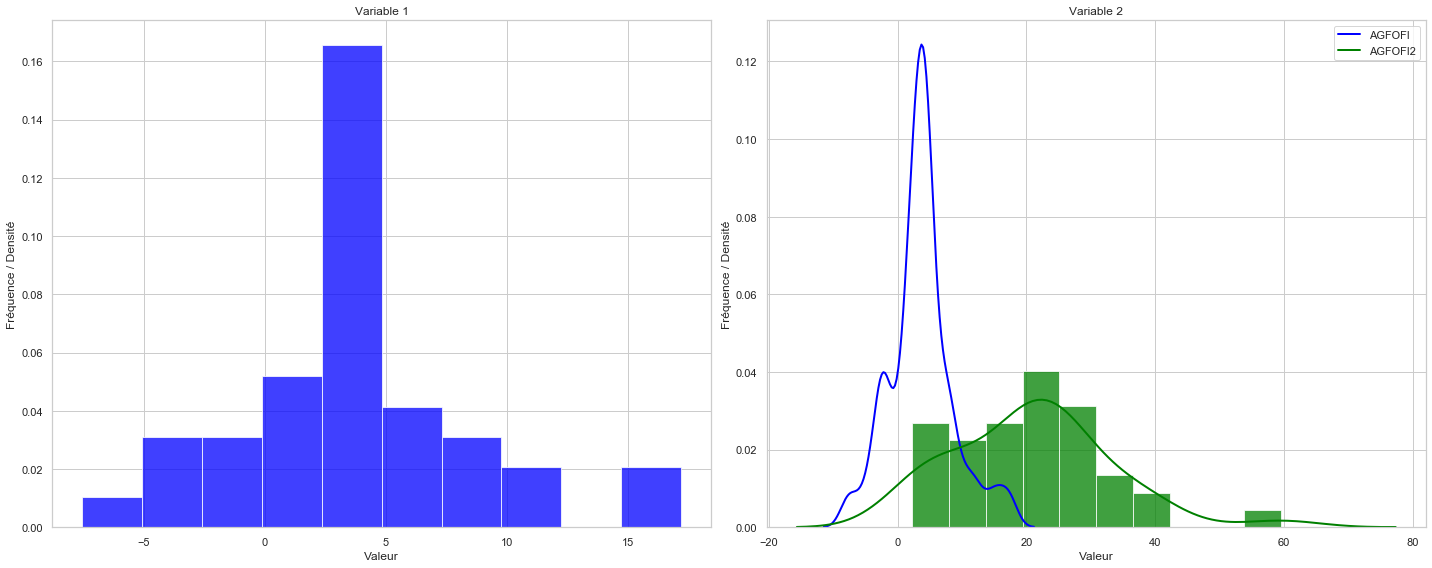

In [369]:
#plotting distribution

data = [df.yMaize, df.yrice, df.ysorgho]

plot_histograms(data)

data2 = [df.AGFOFI, df.AGFOFI2]
plot_histograms2(data2)
plt.show()

In [370]:
#Fill missing data with means
df[pd.isnull(df.yMaize)]

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
21,Liberia,LBR,19.965116,2.945326,52.089,2.031169,2.398169,41.051967,0.072950,1179.5,27.55975,92.96,1162.5,2391,79.084718,5.191030,NaN,11625.0,NaN
29,Nigeria,NGA,75.203399,3.994245,51.958,2.440609,2.169393,24.143306,5.643439,111978.1,55.40000,82.51,1666.9,1150,23.745787,40.484425,NaN,NaN,NaN


In [371]:
np.mean(df.yMaize)

16244.375

In [372]:
#fill yMaize for Liberia and Nigeria 
df['yMaize'][21,29] = np.mean(df.yMaize)

c:\Users\MAYOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [375]:
df[pd.isnull(df.yMaize)]

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho


In [373]:
#Fill missing data with means - rice
df[pd.isnull(df.yrice)]

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
1,Botswana,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,5763.687,71.829124,27.21,1034.7,416,26.917050,0.458772,6670.000,NaN,17876.0
12,Eritrea,ERI,62.722637,3.165100,41.347,1.617400,NaN,NaN,20.785714,706.400,51.392300,80.90,640.0,384,8.718215,5.700556,10000.000,NaN,5185.0
20,Lesotho,LSO,80.138340,2.805683,29.028,1.267841,8.724140,5.028820,0.837476,2311.900,47.497013,41.42,433.3,788,1.137022,14.130435,4569.000,NaN,2996.0
27,Namibia,NAM,47.141348,3.643216,52.033,1.720311,6.286959,9.158178,4.576299,3952.800,52.300000,31.30,429.5,285,8.063866,0.971711,18286.000,NaN,1860.0
29,Nigeria,NGA,75.203399,3.994245,51.958,2.440609,2.169393,24.143306,5.643439,111978.100,55.400000,82.51,1666.9,1150,23.745787,40.484425,16244.375,NaN,NaN


In [374]:
#fill yMaize for Namibia and Nigeria Botswana, Eritrea 
df['yrice'][1,12,20,27,29] = np.mean(df.yrice)

c:\Users\MAYOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [376]:
df[pd.isnull(df.yrice)]

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho


In [377]:
#Fill missing data with means - sorgho
df[pd.isnull(df.ysorgho)]

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
7,Comoros,COM,71.466953,2.639100,29.380,1.900941,4.438564,35.797404,0.833333,328.2,85.635345,48.29,1392.5,900,17.689414,34.927458,20355.000,13091.000000,NaN
9,"Congo, Rep.",COG,31.153734,3.006644,67.829,2.332086,4.494359,11.241748,0.020721,7153.9,48.679131,71.88,883.7,1646,64.263543,1.610542,10000.000,5916.000000,NaN
15,Gabon,GAB,8.356565,2.585991,90.092,2.195637,4.837164,6.628147,0.084817,5349.2,91.062843,90.12,1588.6,1831,91.320681,1.261303,15627.000,28316.000000,NaN
21,Liberia,LBR,19.965116,2.945326,52.089,2.031169,2.398169,41.051967,0.072950,1179.5,27.559750,92.96,1162.5,2391,79.084718,5.191030,16244.375,11625.000000,NaN
29,Nigeria,NGA,75.203399,3.994245,51.958,2.440609,2.169393,24.143306,5.643439,111978.1,55.400000,82.51,1666.9,1150,23.745787,40.484425,16244.375,22681.243243,NaN


In [378]:
#fill yMaize for Namibia and Nigeria Botswana, Eritrea 
df['ysorgho'][7,9,15,21,29] = np.mean(df.ysorgho)

c:\Users\MAYOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\MAYOU\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [379]:
df[pd.isnull(df.ysorgho)]

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho


In [380]:
df.head()

,country,ISO code,agriland,urbpop,urbgrowth,popgrowth,AGFOFI,AGFOFI2,freshwith,CO2,electric,renew_energy,cerealyield,precipitation,forestarea,arabland,yMaize,yrice,ysorgho
0,Angola,AGO,36.810780,4.242778,66.825,3.268348,2.843708,9.946544,0.476824,19814.500,46.955444,61.02,992.5,1010,53.426951,4.305767,10993.0,12375.000000,2286.0
1,Botswana,BWA,45.633723,2.850621,70.877,1.850986,-2.654550,2.208063,9.184483,5763.687,71.829124,27.21,1034.7,416,26.917050,0.458772,6670.0,22681.243243,17876.0
2,Burkina Faso,BFA,46.103801,4.758616,30.607,2.688788,5.146184,18.398079,6.544000,5456.700,18.467279,67.51,1261.7,748,22.720760,21.944444,17625.0,22377.000000,10605.0
3,Burundi,BDI,80.841121,5.393633,13.708,2.867082,2.800360,28.624950,2.784294,713.466,9.100000,83.52,1261.7,1274,10.889408,48.403427,11607.0,30089.000000,5319.0
4,Cameroon,CMR,20.625754,3.745673,57.560,2.711854,1.361914,17.496865,0.398681,9928.400,64.311874,78.94,1665.8,1604,43.029511,13.115864,17694.0,12327.000000,16994.0


<h1> Explanatory analysis & Mapping </h1>
 